In [18]:
import locale

import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from main import prognose
from scipy import stats
import seaborn as sns

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12, 9)
pd.set_option('display.float_format', lambda x: '%0.3e' % x)

Plotte die Grundgesamtheit und dann jedes mal wieder nach dem Sieben mittels mehrfacher Prognose

Prognosewert: x >=	 6.2479e-05 W


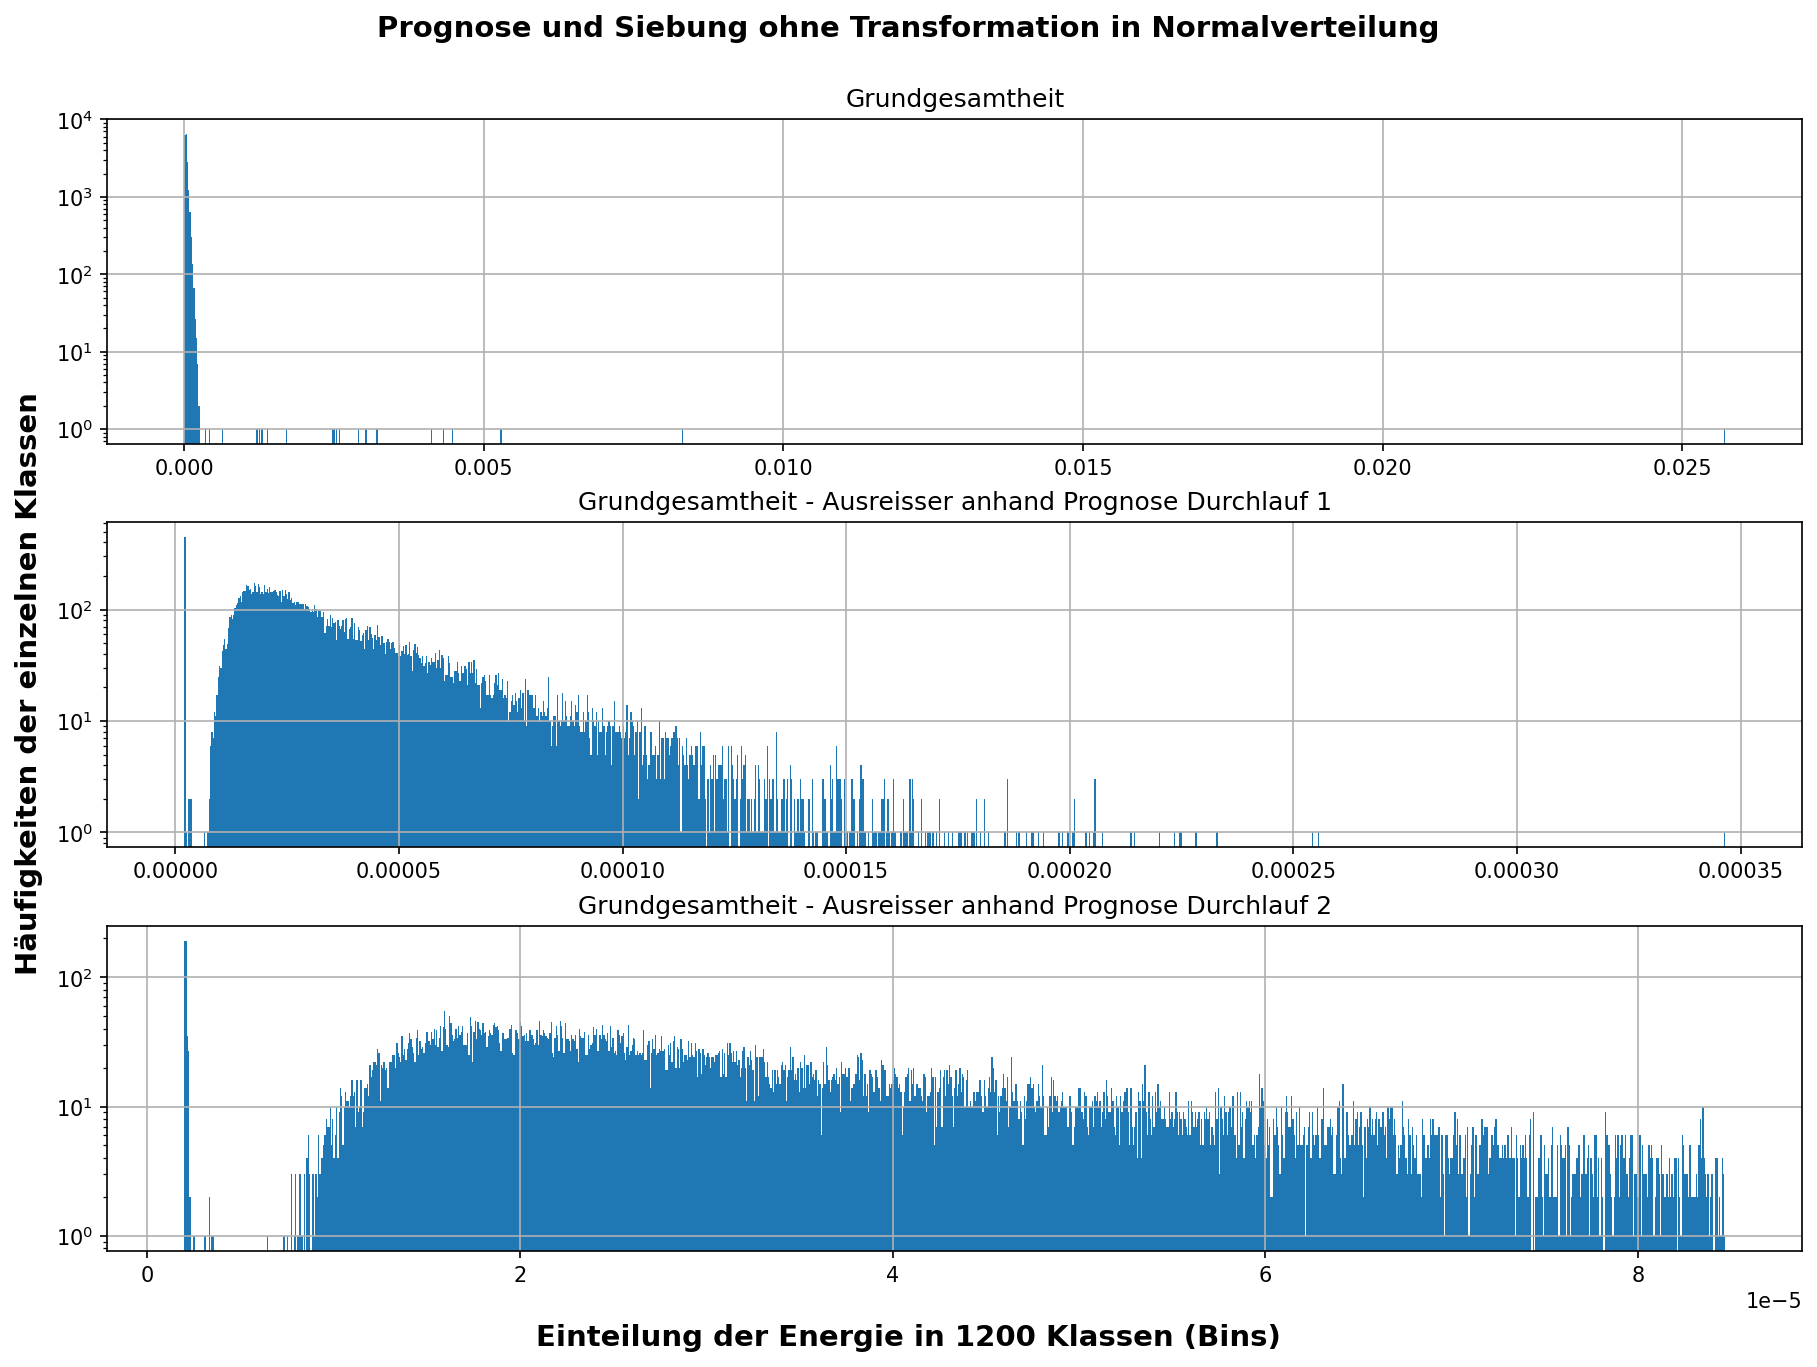

Prognosewert: x >=	 0.000407759 W
Prognosewert: x >=	 8.4697e-05 W
Prognosewert: x >=	 6.2479e-05 W


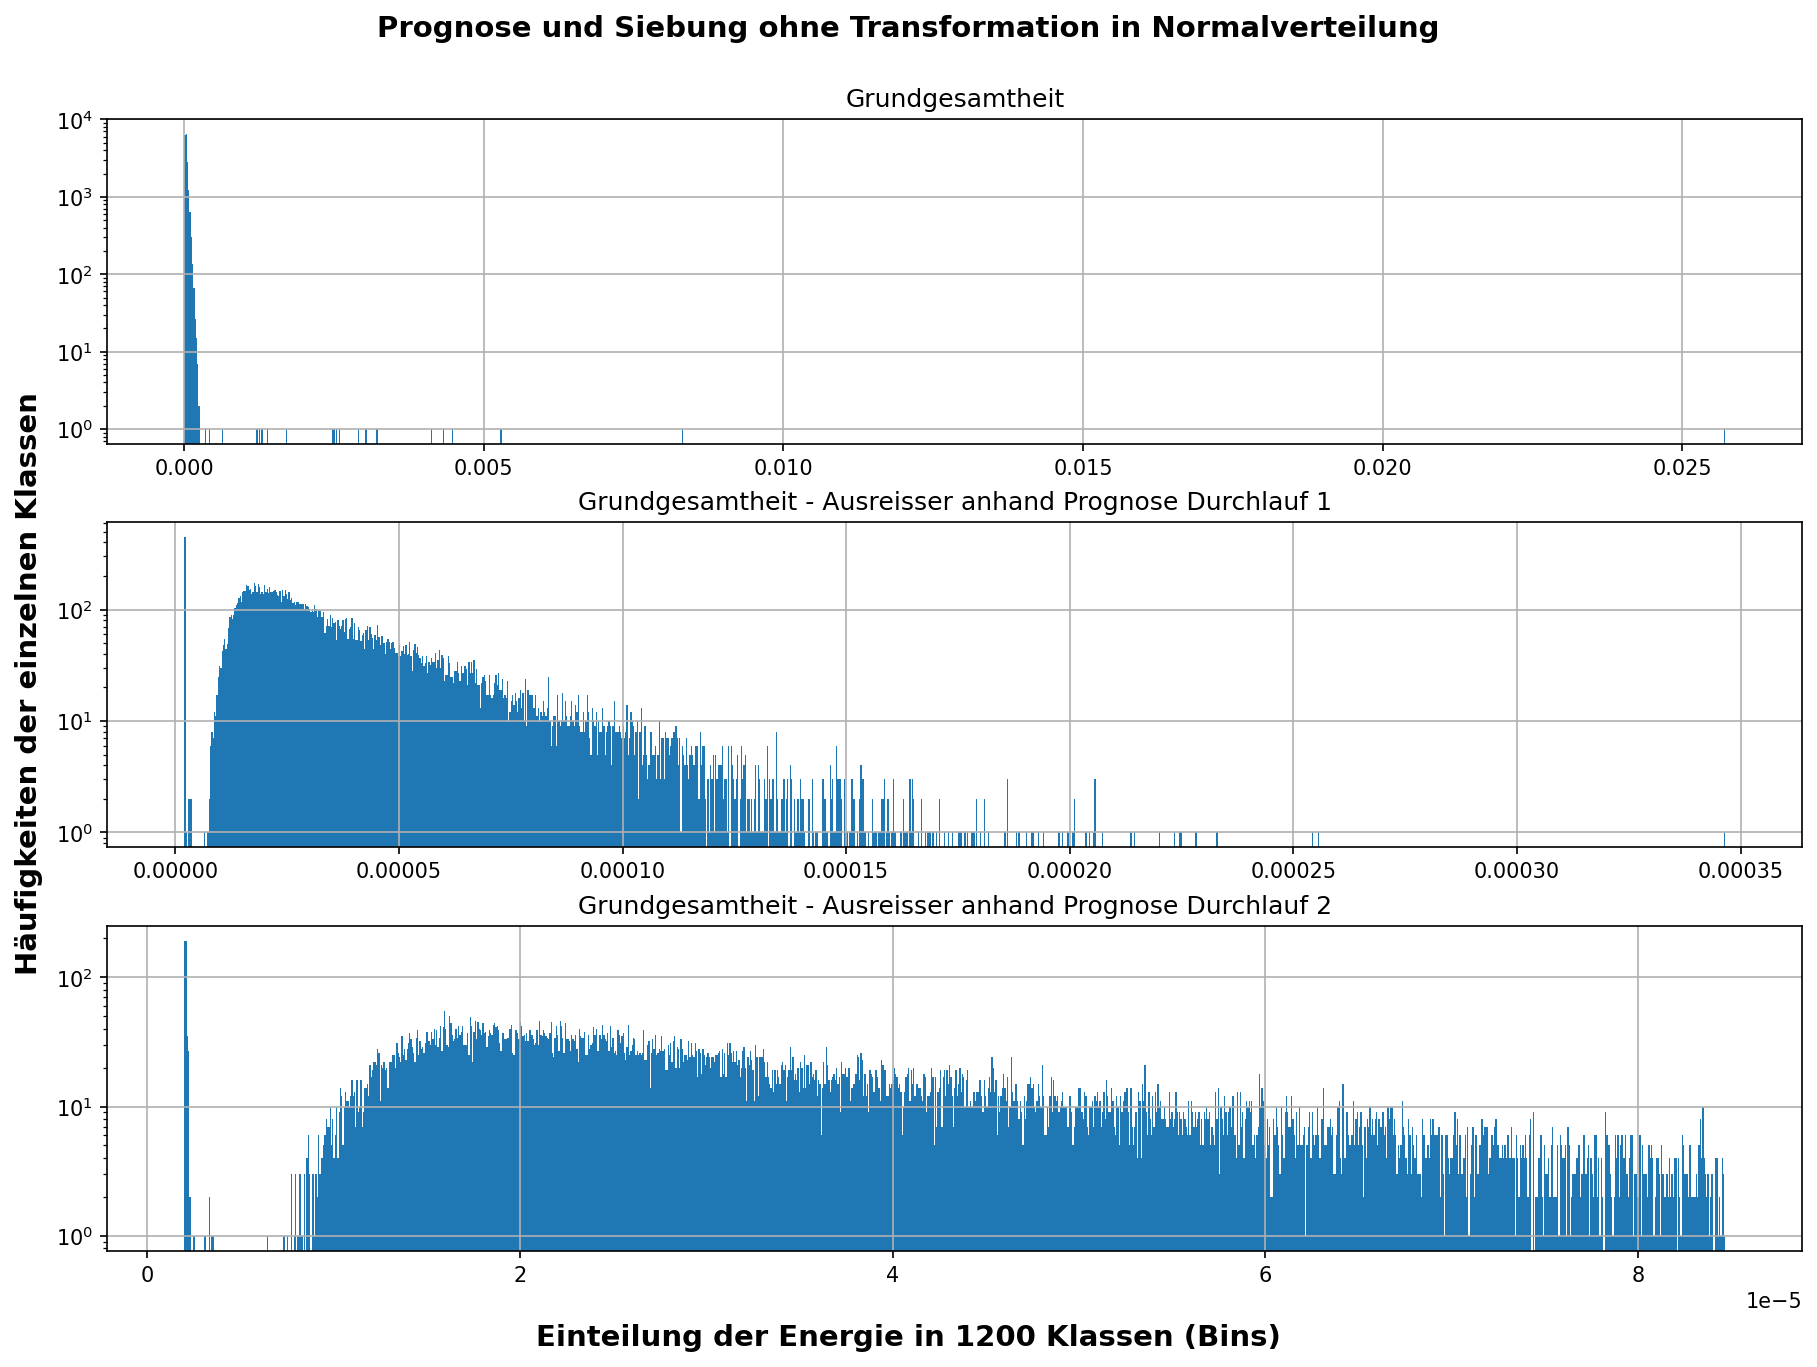

In [19]:
from main import prognose

sieb_energien = pandas.read_csv('gesamtdaten_energien.csv', index_col=0)

fig, ax = plt.subplots(3,1,constrained_layout=True)#, sharex='all')  # , sharey='all')
pwr = sieb_energien['GesamtEnergie'].copy() / 2 ** 15
mult = 2
n_bins = 1200
for i in ax:
    bins = np.linspace(pwr.min(), pwr.max(), n_bins)  # Create bins of equal size between min_value and max_value

    #pwr[:].hist(bins=bins, grid=True, log=True, ax=ax[0],alpha=0.33*mult)#, density=True, cumulative=True)
    pwr[:].hist(bins=bins, grid=True, log=True, ax=i)#, density=True, cumulative=True)
    progmax = prognose(pwr.to_numpy(), gamma=0.95, bereich='rechts')
    # siebe nun anhand der prognostizierten Schwellenwerte.
    for x in pwr.index:
        if pwr.loc[x] > progmax:# or pwr.loc[x] < progmin:
            pwr = pwr.drop(x).copy()
    i.grid('True')


fig.suptitle('Prognose und Siebung ohne Transformation in Normalverteilung\n',fontsize=14, fontweight='bold')
xlab = 'Einteilung der Energie in {} Klassen (Bins)'.format(n_bins)
fig.supxlabel(xlab, fontsize=14, fontweight='bold')
ylab = 'Häufigkeiten der einzelnen Klassen'
fig.supylabel(ylab, fontsize=14, fontweight='bold')
#ax[0].text(60, .025, r'$\mu=100,\ \sigma=15$')
ax[0].set_title('Grundgesamtheit')
ax[1].set_title('Grundgesamtheit - Ausreisser anhand Prognose Durchlauf 1')
ax[2].set_title('Grundgesamtheit - Ausreisser anhand Prognose Durchlauf 2')
#ax[0].set_ylabel('')
#ax[1].set_ylabel('')
#ax[2].set_ylabel('')
#fig.tight_layout()
plt.show()

Nun mit boxcox und stats.probplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Prognosewert: x >=	 0.000407759 W


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


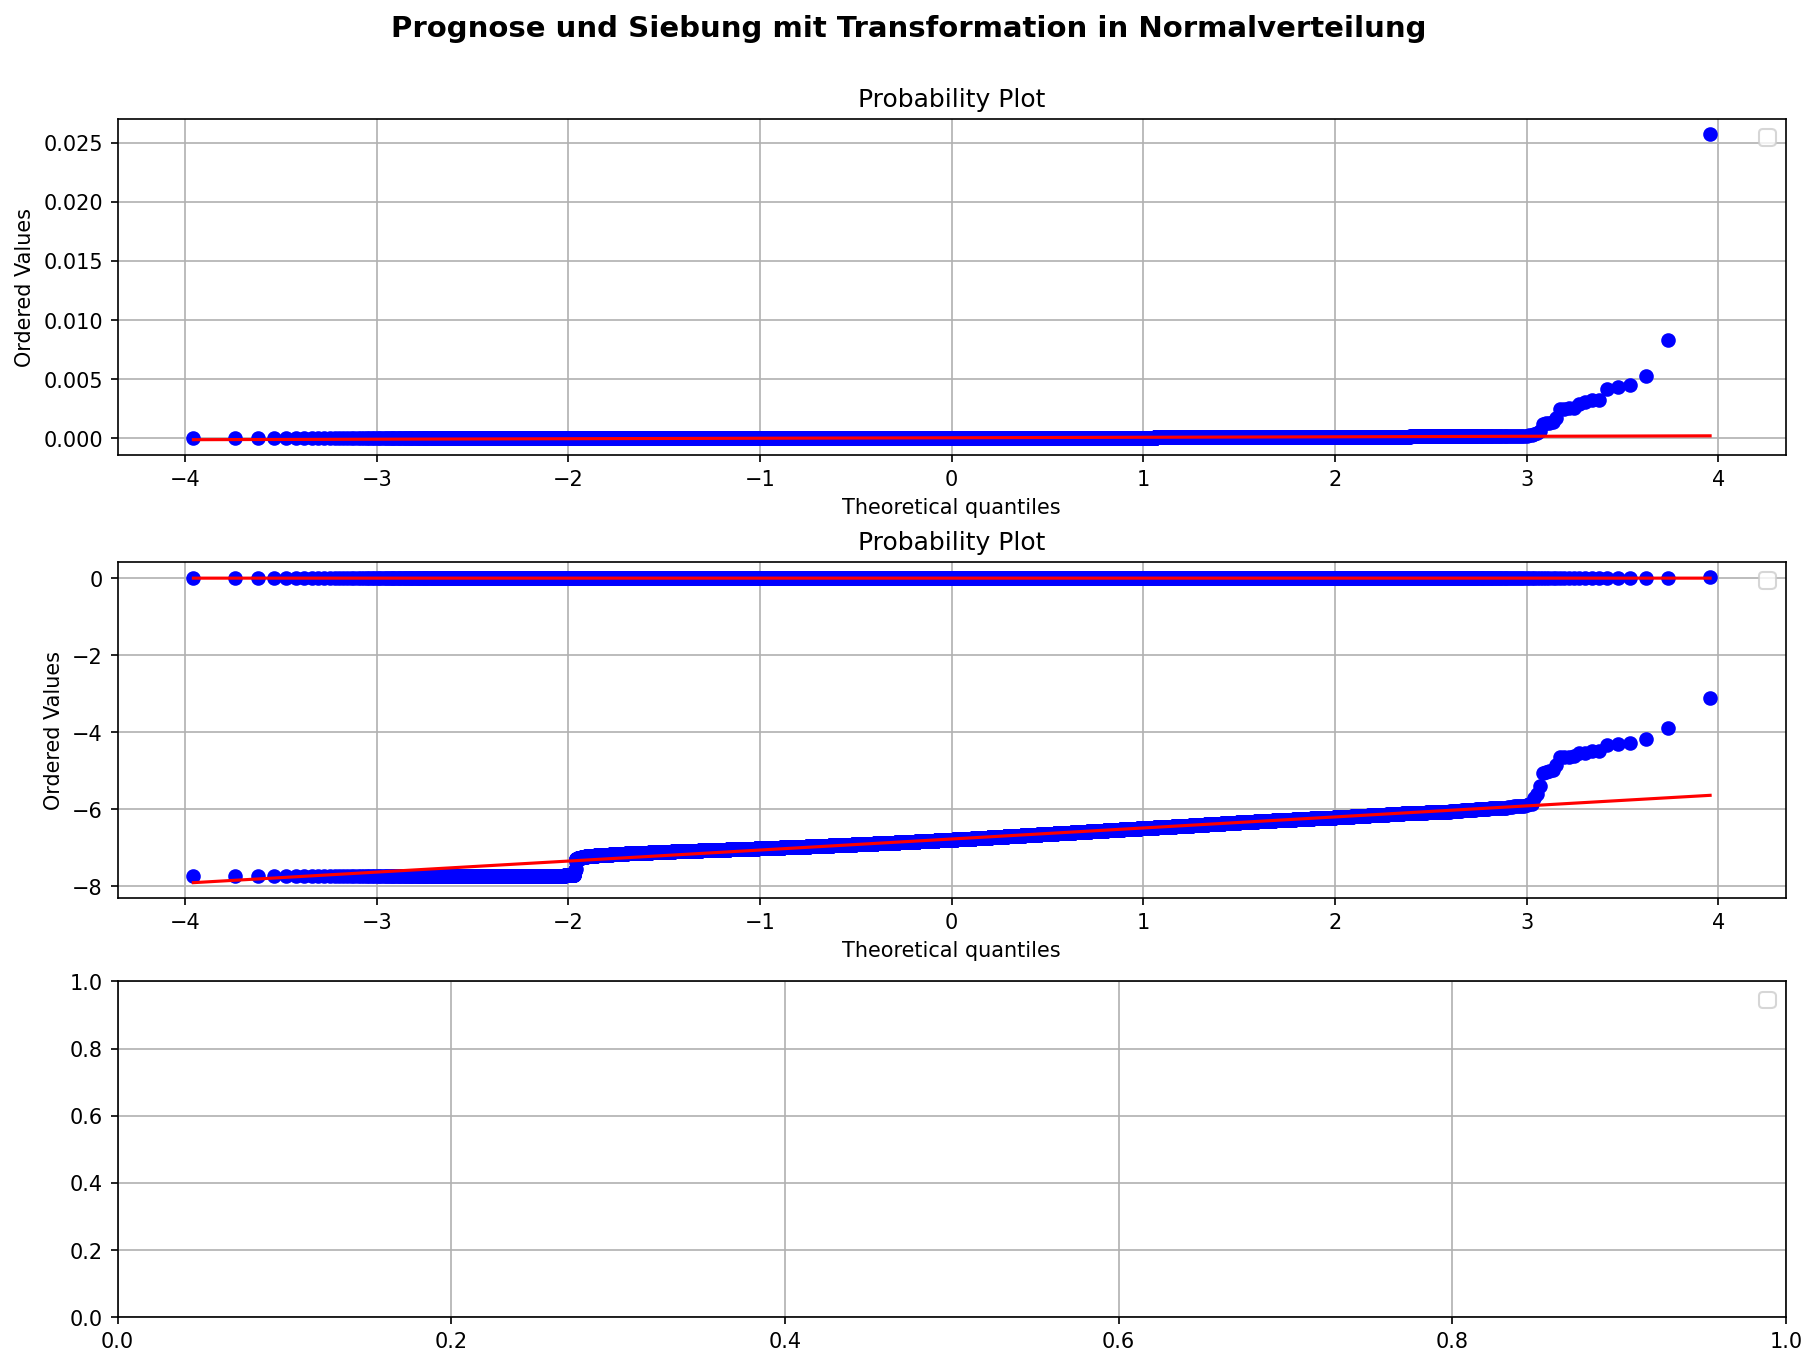

In [31]:
from main import prognose
from scipy import stats
plt.rcParams['figure.dpi'] = 150
# plt.rcParams['interactive'] = True
plt.rcParams['figure.figsize'] = (12, 9)

fig, ax = plt.subplots(3,1,constrained_layout=True)#, sharex='all')  # , sharey='all')
#ax=ax.ravel()
mult = 2
n_bins = 1200
sieb_energien = pandas.read_csv('gesamtdaten_energien.csv', index_col=0)
pwr = sieb_energien['GesamtEnergie'].copy() / 2 ** 15
probpwr = stats.probplot(pwr, dist=stats.norm, plot=ax[0])


for i in ax[1:2]:
    #bins = np.linspace(pwr.min(), pwr.max(), n_bins)  # Create bins of equal size between min_value and max_value
    probpwr = stats.probplot(pwr, dist=stats.norm, plot=i)
    fitted_data, fitted_lambda = stats.boxcox(pwr)
    probfit = stats.probplot(fitted_data, dist=stats.norm, plot=i)
    progmax = prognose(pwr.to_numpy(), gamma=0.95, bereich='rechts')

    # siebe nun anhand der prognostizierten Schwellenwerte.
    for x in pwr.index:
        if pwr.loc[x] > progmax:# or pwr.loc[x] < progmin:
            pwr = pwr.drop(x).copy()

for i in ax:
    i.grid('True')
    i.legend()

fig.suptitle('Prognose und Siebung mit Transformation in Normalverteilung\n',fontsize=14, fontweight='bold')
#xlab = 'Einteilung der Energie in {} Klassen (Bins)'.format(n_bins)
#fig.supxlabel(xlab, fontsize=14, fontweight='bold')
#ylab = 'Häufigkeiten der einzelnen'.format(n_bins)
#fig.supylabel(ylab, fontsize=14, fontweight='bold')
plt.show()

Nun mit boxcox und hist

Prognosewert: x >=	 -6.291392188 W
(18231,)
(17422,)


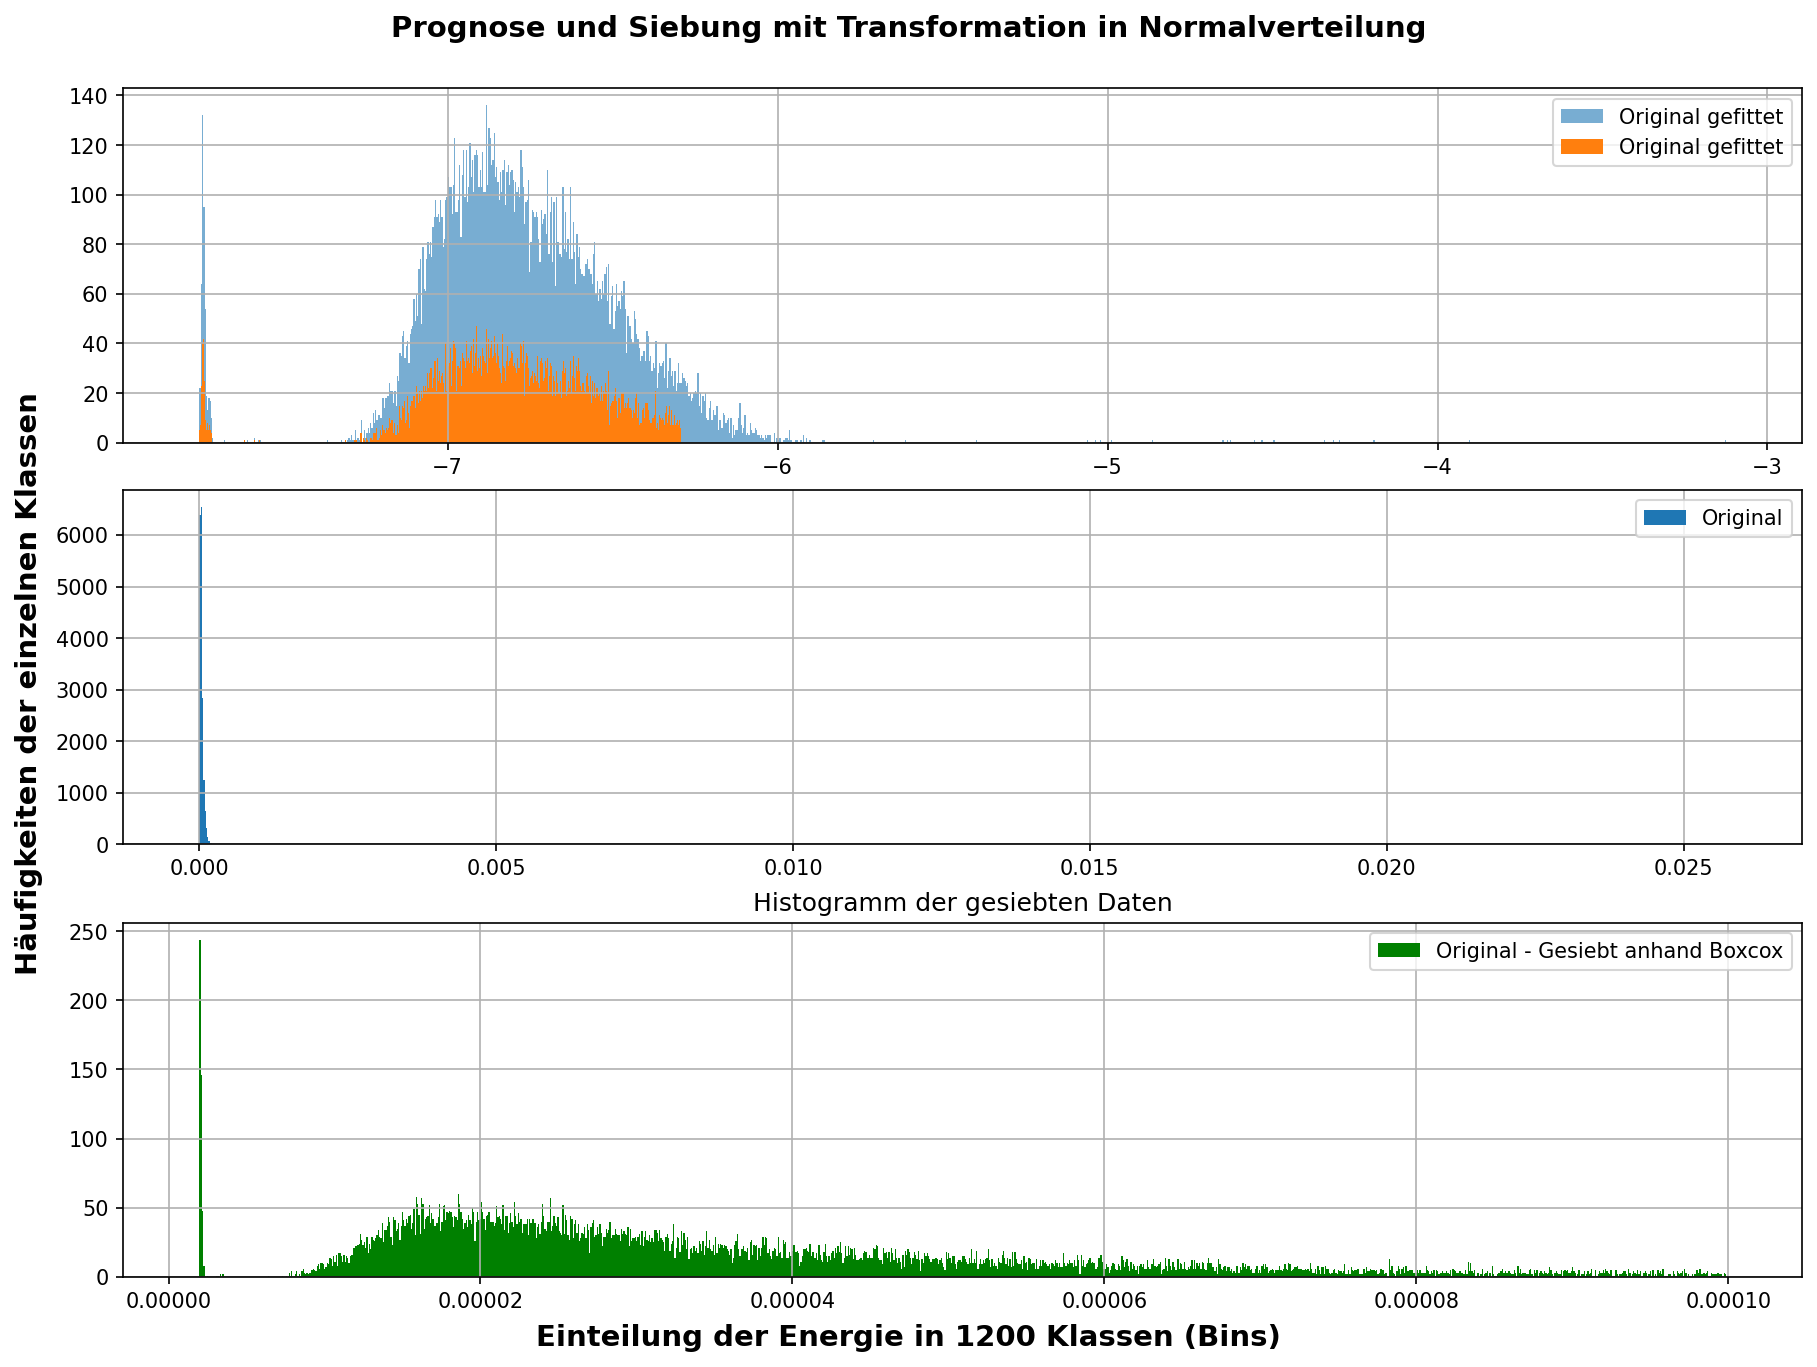

In [32]:
from main import prognose
from scipy import stats
plt.rcParams['figure.dpi'] = 150
# plt.rcParams['interactive'] = True
plt.rcParams['figure.figsize'] = (12, 9)

fig, ax = plt.subplots(3,1,constrained_layout=True)#, sharex='all')  # , sharey='all')
#ax=ax.ravel()
mult = 2
n_bins = 1200

sieb_energien = pandas.read_csv('gesamtdaten_energien.csv', index_col=0)
pwr = sieb_energien['GesamtEnergie'].copy() / 2 ** 15
bins = np.linspace(pwr.min(), pwr.max(), n_bins)
pwr[:].hist(bins=bins, grid=True, log=False, ax=ax[1], label='Original')


# Create bins of equal size between min_value and max_value
#for
fitted_data, fitted_lambda = stats.boxcox(pwr)
fitpwr = pandas.Series(fitted_data,index=pwr.index)
bins = np.linspace(fitpwr.min(), fitpwr.max(), n_bins)
i = ax[0]
fitpwr[:].hist(bins=bins, grid=True, log=False, ax=i, label='Original gefittet',alpha=0.6)#, density=True, cumulative=True
# Berechne 1. Schwellenwert
progmax = prognose(fitpwr.to_numpy(), gamma=0.95, bereich='rechts')

for x in fitpwr.index:
    if fitpwr.loc[x] > progmax:# or pwr.loc[x] < progmin:
        fitpwr = fitpwr.drop(x).copy()

bins = np.linspace(fitpwr.min(), fitpwr.max(), n_bins)
i = ax[0]
fitpwr[:].hist(bins=bins, grid=True, log=False, ax=i, label='Original gefittet')


print(pwr.shape)
fitlist = fitpwr.index.tolist()
for x in pwr.index:
    if x in fitlist:# or pwr.loc[x] < progmin:
        pass
    else:
        pwr.drop(x, inplace=True)
print(pwr.shape)

bins = np.linspace(pwr.min(), pwr.max(), n_bins)
pwr[:].hist(bins=bins,color='g' ,grid=True, log=False, ax=ax[2], label='Original - Gesiebt anhand Boxcox')
axs = ax[2]
axs.set_title('Histogramm der gesiebten Daten')

for i in ax:
    i.grid('True')
    i.legend()

fig.suptitle('Prognose und Siebung mit Transformation in Normalverteilung\n',fontsize=14, fontweight='bold')
xlab = 'Einteilung der Energie in {} Klassen (Bins)'.format(n_bins)
fig.supxlabel(xlab, fontsize=14, fontweight='bold')
ylab = 'Häufigkeiten der einzelnen Klassen'
fig.supylabel(ylab, fontsize=14, fontweight='bold')
plt.show()

In [22]:
print(pwr.shape)
fitlist = fitpwr.index.tolist()
for x in pwr.index:
    if x in fitlist:# or pwr.loc[x] < progmin:
        pass
    else:
        pwr = pwr.drop(x).copy()
print(pwr.shape)

(17422,)
(17422,)


In [23]:
x = ' 20220509_16_09_32.wav'
if x in fitlist:
    print("OK")

OK


In [24]:
print(os.getcwd())

C:\Users\mirko\PycharmProjects\ss22_dfss_clock


In [25]:
#os.chdir("bilder_doku")
#fig.savefig('boxcox.png')
os.chdir(r'C:\Users\mirko\PycharmProjects\ss22_dfss_clock')

In [26]:
a = pwr.nsmallest(10)
print(a)

 20220510_01_00_58.wav   1.981e-06
 20220510_01_01_01.wav   1.983e-06
 20220510_01_04_14.wav   1.984e-06
 20220510_01_05_14.wav   1.985e-06
 20220510_06_01_48.wav   1.987e-06
 20220510_02_00_58.wav   1.991e-06
 20220510_02_00_28.wav   1.994e-06
 20220510_02_01_35.wav   1.994e-06
 20220510_01_01_51.wav   1.994e-06
 20220510_01_04_05.wav   1.994e-06
Name: GesamtEnergie, dtype: float64


In [37]:
pd.set_option('display.float_format', lambda x: '%0.3e' % x)

In [74]:
qu = sieb_energien['GesamtEnergie'].quantile(0.01)
qun = qu /2**15
txt = ('Erfahrungsgemäß ist der Untere Schwellenwert: \t{} Watt\n' +\
'oder Standardisiert: \t\t\t\t{}').format(qu,qun)
print(txt)
anzahl = 0
for x in sieb_energien.index:
    if sieb_energien['GesamtEnergie'].loc[x] > qu:# or pwr.loc[x] < progmin:
        pass
    else:
        anzahl +=1

txt = ('Es gibt insgesamt \t{} Werte die kleiner sind als {}').format(anzahl, qu)
print(txt)

txt = ('Daher werden diese Werte vor dem gelöscht').format(anzahl, qu)
print(txt)

qo = sieb_energien['GesamtEnergie'].quantile(0.999)
qon = qo /2**15
txt = ('Erfahrungsgemäß ist der obere Schwellenwert: \t{} Watt\n' +\
'oder Standardisiert: \t\t\t\t{}').format(qo,qon)
print(txt)
anzahl = 0
for x in sieb_energien.index:
    if sieb_energien['GesamtEnergie'].loc[x] < qo:# or pwr.loc[x] < progmin:
        pass
    else:
        anzahl +=1

txt = ('Es gibt insgesamt \t{} Werte die größer sind als {}').format(anzahl, qo)
print(txt)

txt = ('Eine Untersuchung ob diese Daten gelöscht werden, steht noch aus').format(anzahl, qu)
print(txt)



Erfahrungsgemäß ist der Untere Schwellenwert: 	0.06713120937347405 Watt
oder Standardisiert: 				2.0486819266807268e-06
Es gibt insgesamt 	183 Werte die kleiner sind als 0.06713120937347405
Daher werden diese Werte vor dem gelöscht
Erfahrungsgemäß ist der obere Schwellenwert: 	35.27932533264963 Watt
oder Standardisiert: 				0.0010766395670364266
Es gibt insgesamt 	19 Werte die größer sind als 35.27932533264963
Daher werden diese Werte vor dem gelöscht


In [ ]:
minimalschwellle =pwr.quantile(0.01) # eigentlich lieber mit der fft für frequenzen kleiner 300 Hz

for x in pwr.index:
    if pwr.loc[x] > minimalschwellle:# or pwr.loc[x] < progmin:
        pass
    else:
        pwr.drop(x, inplace=True)

In [38]:
pwr.shape




(17247,)